# Iris

This example uses the 'iris' dataset to predict the species of various flowers based on their physical features. You can download the Jupyter Notebook of the study <a href="iris.ipynb">here</a>.

<ul class="ul_content">
    <li><b>PetalLengthCm: </b>Petal Length in cm</li>
    <li><b>PetalWidthCm: </b>Petal Width in cm</li>
    <li><b>SepalLengthCm: </b>Sepal Length in cm</li>
    <li><b>SepalWidthCm: </b>Sepal Width in cm</li>
    <li><b>Species: </b>The Flower Species (Setosa, Virginica, Versicolor)</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [24]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [1]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset.

,"123SepalLengthCmNumeric(5,2)","123SepalWidthCmNumeric(5,2)","123PetalLengthCmNumeric(5,2)","123PetalWidthCmNumeric(5,2)",AbcSpeciesVarchar(30)
1,4.3,3.0,1.1,0.1,Iris-setosa
2,4.4,2.9,1.4,0.2,Iris-setosa
3,4.4,3.0,1.3,0.2,Iris-setosa
4,4.4,3.2,1.3,0.2,Iris-setosa
5,4.5,2.3,1.3,0.3,Iris-setosa

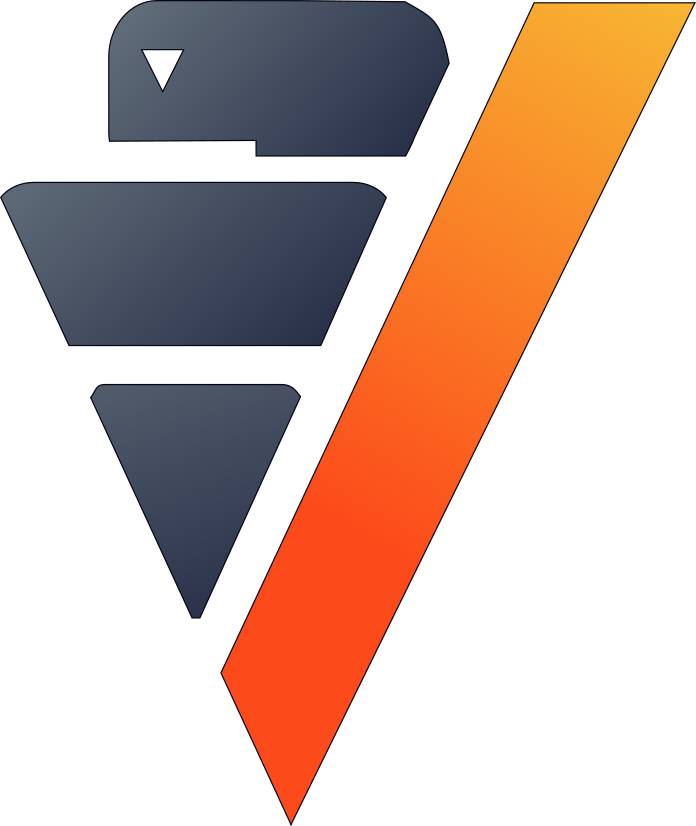

In [11]:
from verticapy.datasets import load_iris
import verticapy.stats as st
iris = load_iris()
iris.head(5)

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

,dtype,count,top,top_percent,unique
"""SepalLengthCm""","numeric(5,2)",150,5.0,6.667,35.0
"""SepalWidthCm""","numeric(5,2)",150,3.0,17.333,23.0
"""PetalLengthCm""","numeric(5,2)",150,1.5,9.333,43.0
"""PetalWidthCm""","numeric(5,2)",150,0.2,18.667,22.0
"""Species""",varchar(30),150,Iris-setosa,33.333,3.0

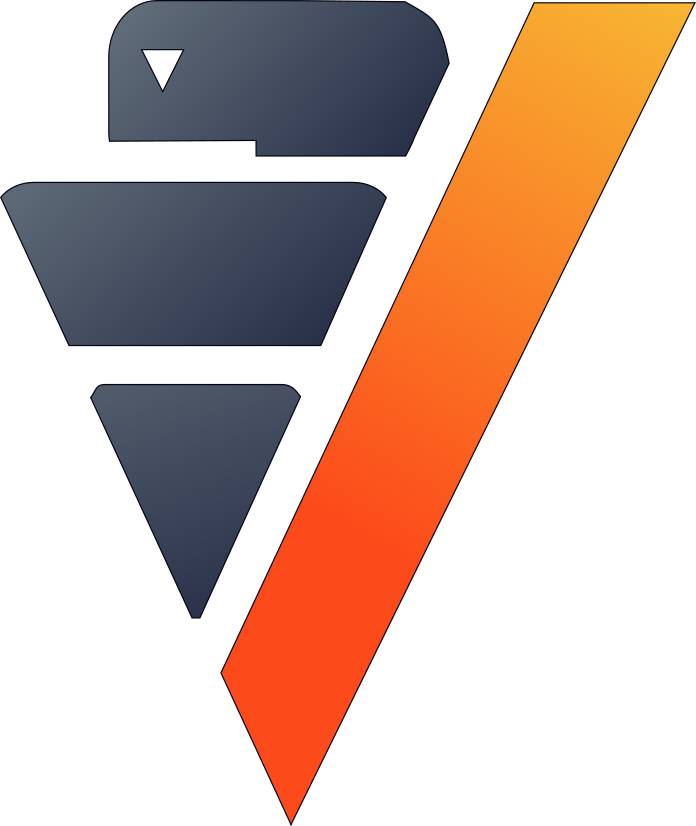

In [12]:
iris.describe(method = "categorical", unique=True)

We don't have much data here, but that's okay; since different flower species have different proportions and ratios between those proportions, we can start by making ratios between each feature.

We'll need to use the One-Hot Encoder on the 'Species' to get information about each species.

In [13]:
iris["Species"].one_hot_encode(drop_first = False)
iris["ratio_pwl"] = iris["PetalWidthCm"] / iris["PetalLengthCm"]
iris["ratio_swl"] = iris["SepalWidthCm"] / iris["SepalLengthCm"]

We can draw the correlation matrix (Pearson correlation coefficient) of the new features to see if there are some linear links.

,"""SepalLengthCm""","""SepalWidthCm""","""PetalLengthCm""","""PetalWidthCm""","""Species_Iris-setosa""","""Species_Iris-versicolor""","""Species_Iris-virginica""","""ratio_pwl""","""ratio_swl"""
"""SepalLengthCm""",1.0,-0.109369249950656,0.871754157304886,0.817953633369181,-0.717415668686111,0.0793955238434444,0.63802014484266,0.645854809352185,-0.724085081370438
"""SepalWidthCm""",-0.109369249950656,1.0,-0.420516096401169,-0.356544089613812,0.595600845226849,-0.464699560561606,-0.13090128466524,-0.339854865893446,0.755415996230207
"""PetalLengthCm""",0.871754157304886,-0.420516096401169,1.0,0.962757097050968,-0.922688332883109,0.201586759537506,0.721101573345601,0.8129592586072,-0.867296724293694
"""PetalWidthCm""",0.817953633369181,-0.356544089613812,0.962757097050968,1.0,-0.887509958782658,0.118375979139307,0.76913397964335,0.910838299356941,-0.796309230951869
"""Species_Iris-setosa""",-0.717415668686111,0.595600845226849,-0.922688332883109,-0.887509958782658,1.0,-0.5,-0.5,-0.825149778706552,0.907112624976622
"""Species_Iris-versicolor""",0.0793955238434444,-0.464699560561606,0.201586759537506,0.118375979139307,-0.5,1.0,-0.5,0.212967593449348,-0.409714538856098
"""Species_Iris-virginica""",0.63802014484266,-0.13090128466524,0.721101573345601,0.76913397964335,-0.5,-0.5,1.0,0.612182185257205,-0.497398086120528
"""ratio_pwl""",0.645854809352185,-0.339854865893446,0.8129592586072,0.910838299356941,-0.825149778706552,0.212967593449348,0.612182185257205,1.0,-0.689720454015874
"""ratio_swl""",-0.724085081370438,0.755415996230207,-0.867296724293694,-0.796309230951869,0.907112624976622,-0.409714538856098,-0.497398086120528,-0.689720454015874,1.0

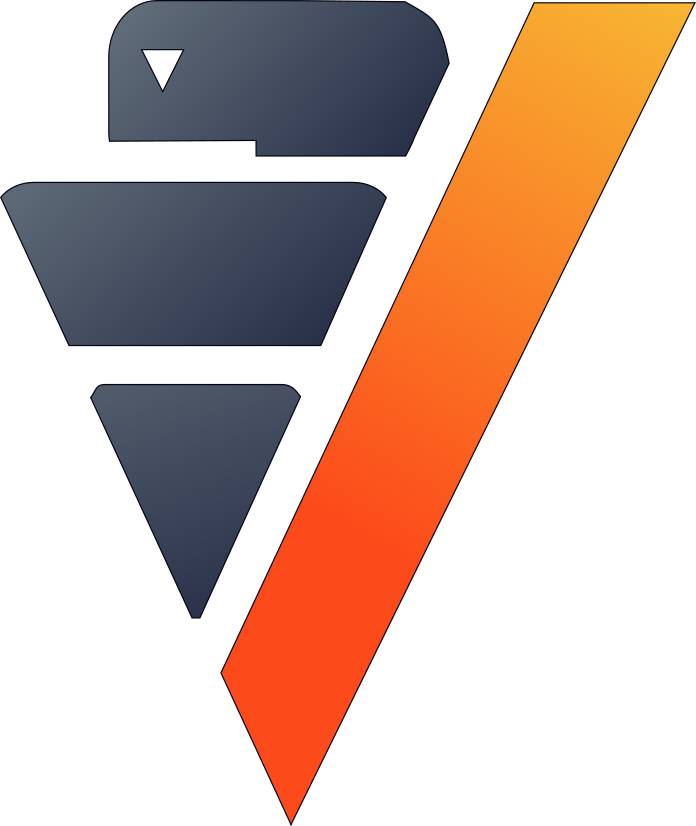

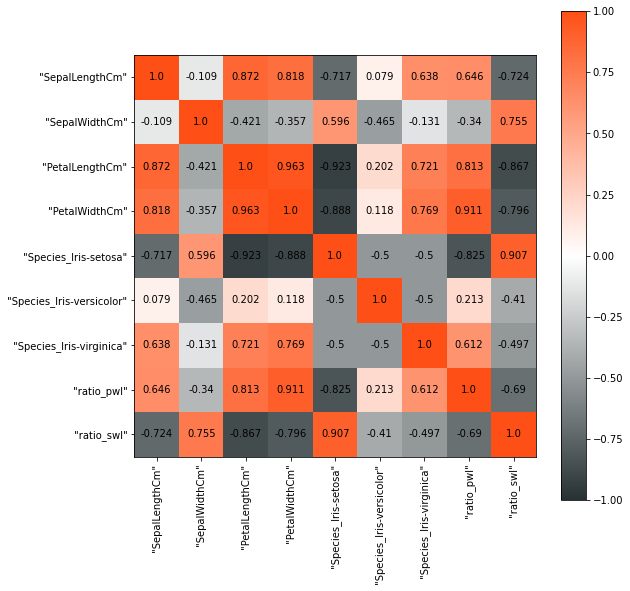

In [14]:
%matplotlib inline
iris.corr()

The Iris setosa is highly linearly correlated with the petal length and the sepal ratio. We can see a perfect separation using the two features (though we can also see this separation the petal length alone).

<AxesSubplot:xlabel='"PetalLengthCm"', ylabel='"ratio_swl"'>

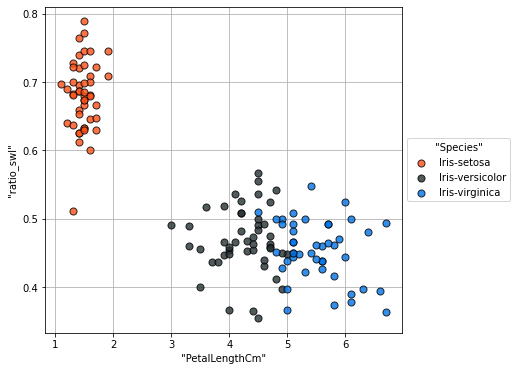

In [15]:
iris.scatter(columns = ["PetalLengthCm", "ratio_swl"], 
             catcol = "Species")

We can we a clear linear separation between the Iris setosa and the other species, but we'll need more features to identify the differences between Iris virginica and Iris versicolor.

<Axes3DSubplot:xlabel='"PetalLengthCm"', ylabel='"PetalWidthCm"'>

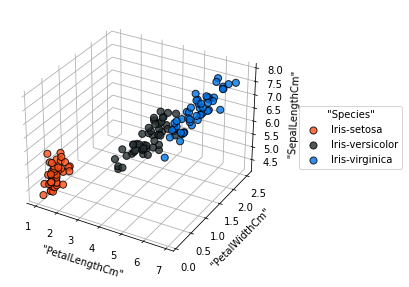

In [16]:
iris.scatter(columns = ["PetalLengthCm", 
                        "PetalWidthCm", 
                        "SepalLengthCm"], 
             catcol = "Species")

Our strategy is simple: we'll use two Linear Support Vector Classification (SVC): one to classify the Iris setosa and another to classify the Iris versicolor.

## Machine Learning

Let's build the first Linear SVC to predict if a flower is an Iris setosa.

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi,time
1-fold,1.0,0.9999999999999999,1.0,0.0852135991098265,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.638392686843872
2-fold,1.0,0.9999999999999999,1.0,0.0808943478921133,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5792129039764404
3-fold,0.9999999999999999,1.0,1.0,0.0744378576492842,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.4164810180664062
avg,1.0,0.9999999999999999,1.0,0.08018193488374134,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.544695536295573
std,6.409875621278546e-17,6.409875621278546e-17,0.0,0.005423080326436787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11491206937746823

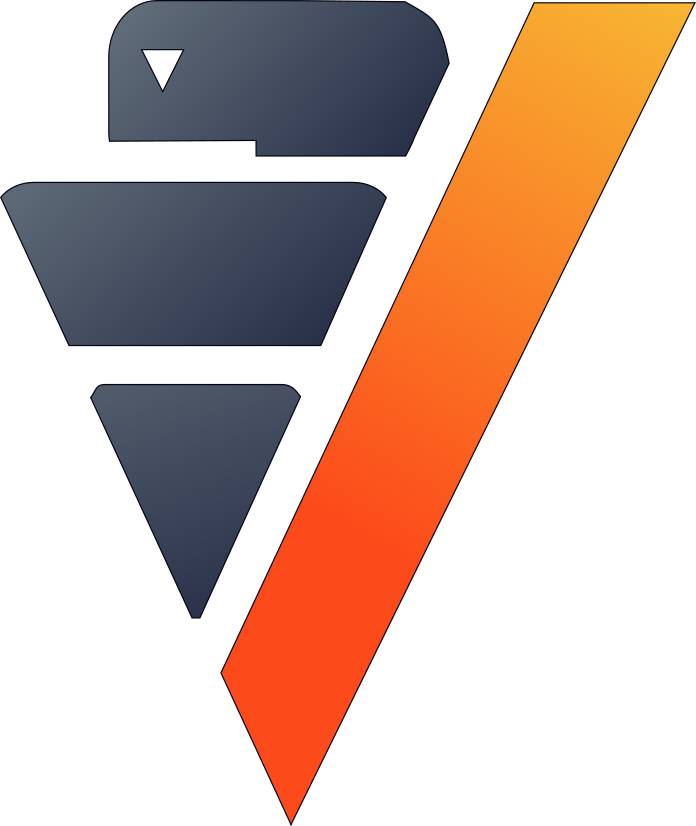

In [17]:
from verticapy.learn.svm import LinearSVC
from verticapy.learn.model_selection import cross_validate

predictors = ["PetalLengthCm", "ratio_swl"]
response = "Species_Iris-setosa"
model = LinearSVC("svc_setosa_iris")
cross_validate(model, iris, predictors, response)

Our model is excellent. Let's build it using the entire dataset.

In [18]:
model.fit(iris, predictors, response)



details
  predictor  |coefficient
-------------+-----------
  Intercept  |  1.38349  
petallengthcm| -0.84012  
  ratio_swl  |  1.32517  


call_string
SELECT svm_classifier('public.svc_setosa_iris', '"public"."_verticapy_tmp_view_dbadmin_40328_9186882012_"', '"species_iris-setosa"', '"PetalLengthCm", "ratio_swl"'
USING PARAMETERS class_weights='1,1', C=1, max_iterations=100, intercept_mode='regularized', intercept_scaling=1, epsilon=0.0001);

Additional Info
       Name       |Value
------------------+-----
accepted_row_count| 150 
rejected_row_count|  0  
 iteration_count  |  7  

Let's plot the model to see the perfect separation.

<AxesSubplot:xlabel='"PetalLengthCm"', ylabel='"ratio_swl"'>

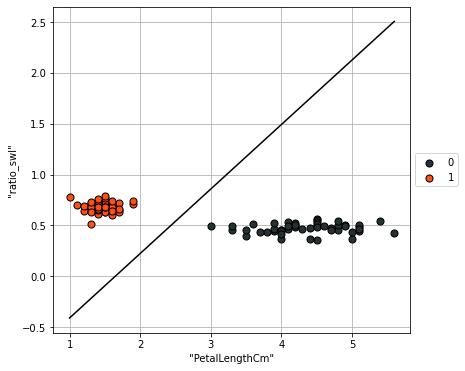

In [19]:
model.plot()

We can add this probability to the vDataFrame.

,"123SepalLengthCmNumeric(5,2)","123SepalWidthCmNumeric(5,2)","123PetalLengthCmNumeric(5,2)","123PetalWidthCmNumeric(5,2)",AbcSpeciesVarchar(30),123Species_Iris-setosaBool,123Species_Iris-versicolorBool,123Species_Iris-virginicaBool,"123ratio_pwlNumeric(20,15)","123ratio_swlNumeric(20,15)",123setosaFloat
1,4.3,3.0,1.1,0.1,Iris-setosa,1,0,0,0.090909090909091,0.697674418604651,0.799616133475824
2,4.4,2.9,1.4,0.2,Iris-setosa,1,0,0,0.142857142857143,0.659090909090909,0.746632427676863
3,4.4,3.0,1.3,0.2,Iris-setosa,1,0,0,0.153846153846154,0.681818181818182,0.767609329878423
4,4.4,3.2,1.3,0.2,Iris-setosa,1,0,0,0.153846153846154,0.727272727272727,0.778180760876583
5,4.5,2.3,1.3,0.3,Iris-setosa,1,0,0,0.230769230769231,0.511111111111111,0.724849376339106
6,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0,0.133333333333333,0.673913043478261,0.734263300128653
7,4.6,3.2,1.4,0.2,Iris-setosa,1,0,0,0.142857142857143,0.695652173913043,0.755687832710383
8,4.6,3.4,1.4,0.3,Iris-setosa,1,0,0,0.214285714285714,0.739130434782609,0.766167839545688
9,4.6,3.6,1.0,0.2,Iris-setosa,1,0,0,0.2,0.782608695652174,0.82926980908022
10,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0,0.153846153846154,0.680851063829787,0.76738063375719

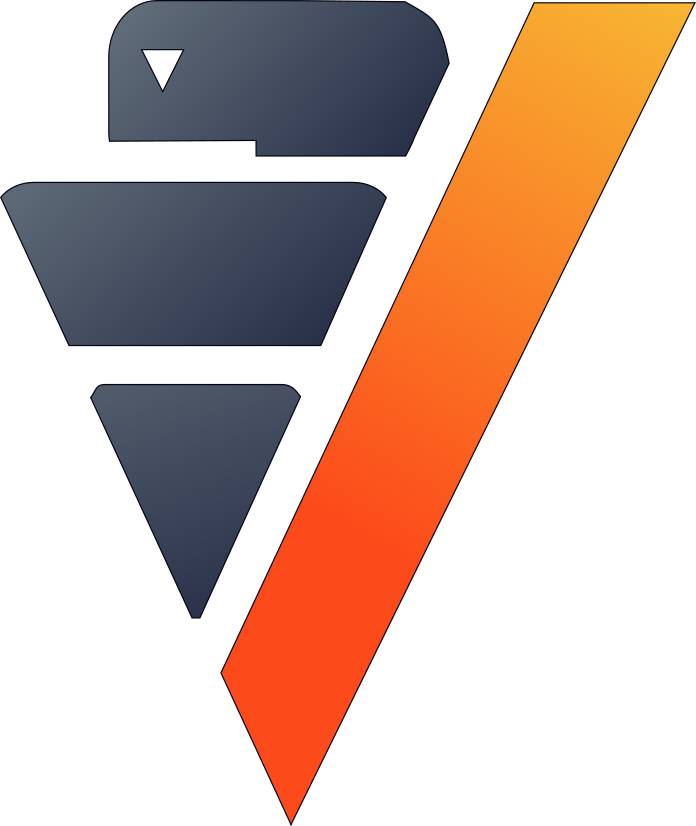

In [20]:
model.predict_proba(iris, name = "setosa", pos_label=1)

Let's create a model to classify the Iris virginica.

,auc,prc_auc,accuracy,log_loss,precision,recall,f1_score,mcc,informedness,markedness,csi,time
1-fold,0.9883333333333334,0.9809541204839196,0.96,0.124753596556893,0.9090909090909091,1.0,0.9523809523809523,0.9211323729436766,0.9333333333333333,0.9090909090909092,0.9090909090909091,1.9328792095184326
2-fold,0.9961904761904762,0.9910912698412698,0.98,0.0803143364420691,0.9375,1.0,0.967741935483871,0.9543135154205278,0.9714285714285715,0.9375,0.9375,1.7381629943847656
3-fold,1.0,0.9999999999999999,1.0,0.0850368152073147,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.480771780014038
avg,0.9948412698412699,0.9906817967750631,0.98,0.0967015827354256,0.9488636363636364,1.0,0.9733742959549411,0.9584819627880681,0.9682539682539683,0.9488636363636364,0.9488636363636364,1.717271327972412
std,0.005949205502193667,0.009529540008794923,0.020000000000000018,0.02440823756443503,0.04650768620382075,0.0,0.02430403335648915,0.039598707232254386,0.03344651985032615,0.0465076862038207,0.04650768620382075,0.2267766042769438

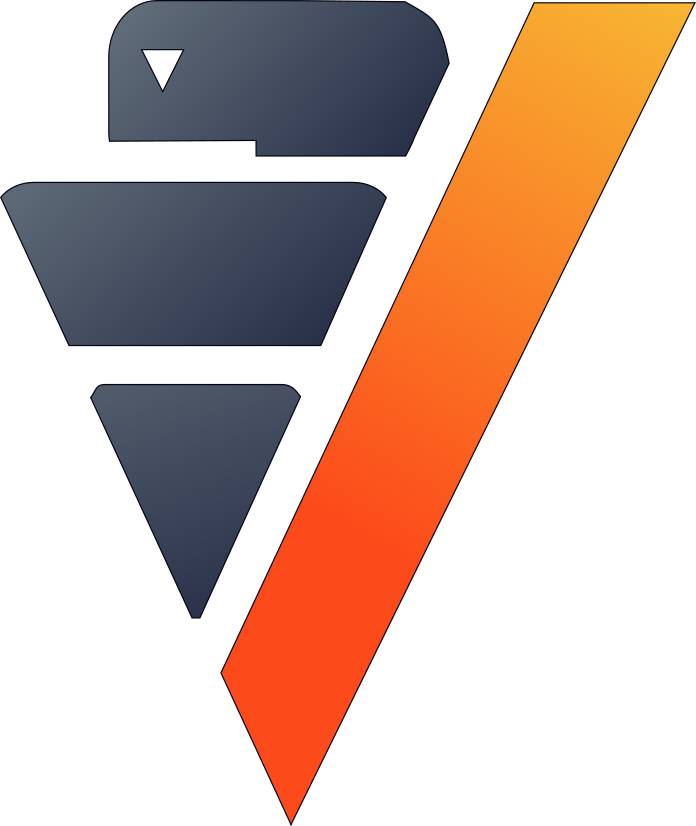

In [21]:
predictors = ["PetalLengthCm", "SepalLengthCm", "SepalWidthCm", 
              "PetalWidthCm", "ratio_pwl", "ratio_swl"]
response = "Species_Iris-virginica"
model = LinearSVC("svc_virginica_iris")
cross_validate(model, iris, predictors, response)

We have another excellent model. Let's add it to the vDataFrame.

,"123SepalLengthCmNumeric(5,2)","123SepalWidthCmNumeric(5,2)","123PetalLengthCmNumeric(5,2)","123PetalWidthCmNumeric(5,2)",AbcSpeciesVarchar(30),123Species_Iris-setosaBool,123Species_Iris-versicolorBool,123Species_Iris-virginicaBool,"123ratio_pwlNumeric(20,15)","123ratio_swlNumeric(20,15)",123setosaFloat,123virginicaFloat
1,4.3,3.0,1.1,0.1,Iris-setosa,1,0,0,0.090909090909091,0.697674418604651,0.799616133475824,0.00122433036640019
2,4.4,2.9,1.4,0.2,Iris-setosa,1,0,0,0.142857142857143,0.659090909090909,0.746632427676863,0.00227047297381315
3,4.4,3.0,1.3,0.2,Iris-setosa,1,0,0,0.153846153846154,0.681818181818182,0.767609329878423,0.00178314462746812
4,4.4,3.2,1.3,0.2,Iris-setosa,1,0,0,0.153846153846154,0.727272727272727,0.778180760876583,0.00145150073932887
5,4.5,2.3,1.3,0.3,Iris-setosa,1,0,0,0.230769230769231,0.511111111111111,0.724849376339106,0.00403116120042452
6,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0,0.133333333333333,0.673913043478261,0.734263300128653,0.00183033491108253
7,4.6,3.2,1.4,0.2,Iris-setosa,1,0,0,0.142857142857143,0.695652173913043,0.755687832710383,0.00143889895527319
8,4.6,3.4,1.4,0.3,Iris-setosa,1,0,0,0.214285714285714,0.739130434782609,0.766167839545688,0.0013969736269709
9,4.6,3.6,1.0,0.2,Iris-setosa,1,0,0,0.2,0.782608695652174,0.82926980908022,0.000547208473932473
10,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0,0.153846153846154,0.680851063829787,0.76738063375719,0.00116230418864846

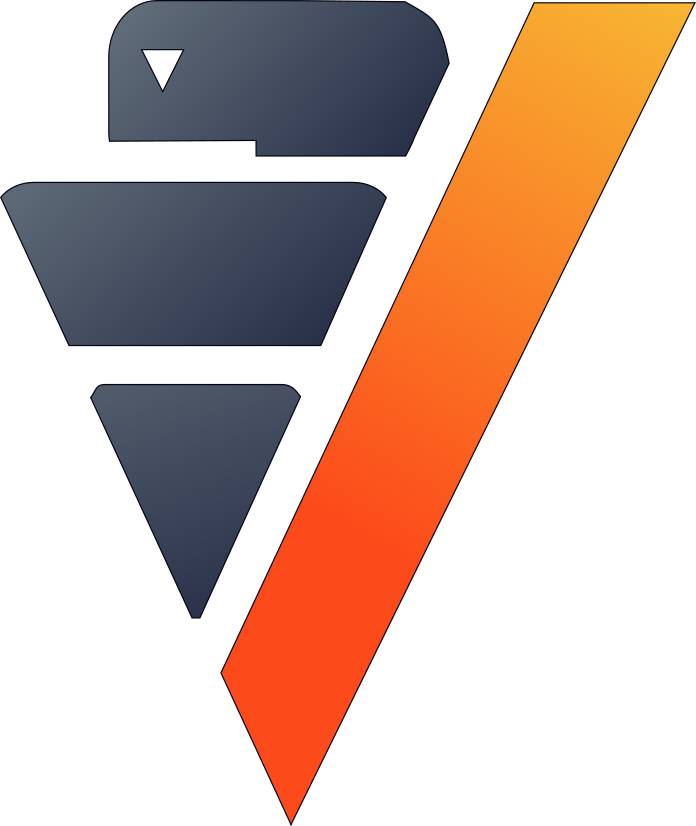

In [22]:
model.fit(iris, predictors, response)
model.predict_proba(iris, name = "virginica", pos_label=1)

Let's evaluate our final model (the combination of two Linear SVCs).

In [23]:
iris.case_when("prediction",
               iris["setosa"] > 0.5, 'Iris-setosa',
               iris["virginica"] > 0.5, 'Iris-virginica',
               'Iris-versicolor')
iris["score"] = (iris["Species"] == iris["prediction"])
iris["score"].avg()

0.98

We have a great model with an accuracy of 98% on an entirely balanced dataset.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!